In [1]:
from dask.distributed import Client
client = Client(n_workers=1, threads_per_worker=4, processes=True, memory_limit='2GB')
client

<Client: 'tcp://127.0.0.1:38907' processes=1 threads=4, memory=1.86 GiB>

In [2]:
import dask
df = dask.datasets.timeseries()
df

Dask DataFrame Structure:
                   id    name        x        y
npartitions=30                                 
2000-01-01      int64  object  float64  float64
2000-01-02        ...     ...      ...      ...
...               ...     ...      ...      ...
2000-01-30        ...     ...      ...      ...
2000-01-31        ...     ...      ...      ...
Dask Name: make-timeseries, 30 tasks

In [3]:
df = df.persist()

In [4]:
df.groupby('name').x.mean().compute()

name
Alice       0.001546
Bob         0.002780
Charlie    -0.001735
Dan        -0.000043
Edith       0.000327
Frank      -0.002340
George      0.000675
Hannah      0.000032
Ingrid     -0.001006
Jerry       0.003471
Kevin      -0.000690
Laura      -0.000218
Michael    -0.002716
Norbert    -0.002504
Oliver      0.000080
Patricia    0.000996
Quinn      -0.001901
Ray         0.000999
Sarah       0.001139
Tim        -0.001758
Ursula      0.001699
Victor     -0.002216
Wendy       0.002457
Xavier     -0.000535
Yvonne      0.000892
Zelda      -0.000437
Name: x, dtype: float64

In [5]:
%time _ = df.groupby('id').x.mean().compute()

CPU times: user 50.5 ms, sys: 867 µs, total: 51.4 ms
Wall time: 151 ms


In [6]:
%time _ = df.groupby('name').x.mean().compute()

CPU times: user 56.7 ms, sys: 3.87 ms, total: 60.6 ms
Wall time: 286 ms


In [7]:
%time df.groupby('name').agg({'x': ['mean', 'std'], 'y': ['mean', 'count']}).compute().head()

CPU times: user 38.2 ms, sys: 6.94 ms, total: 45.2 ms
Wall time: 218 ms


x                   y        
             mean       std      mean   count
name                                         
Alice    0.001546  0.576689  0.000535   99543
Bob      0.002780  0.578023 -0.000571   99444
Charlie -0.001735  0.575506  0.004474  100740
Dan     -0.000043  0.577867  0.001411   99187
Edith    0.000327  0.577791 -0.002111   99761

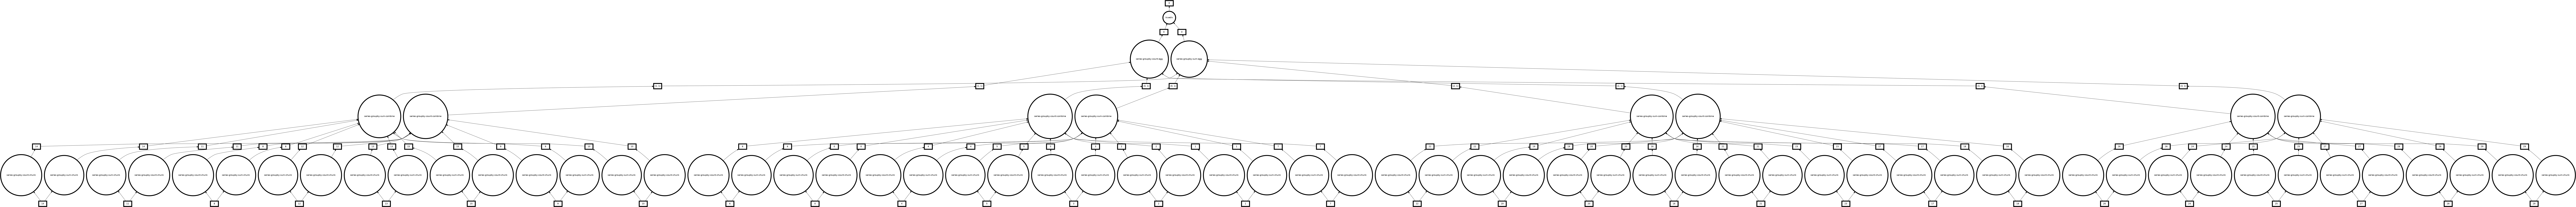

In [12]:
df.groupby('name').x.mean().visualize(node_attr={'penwidth': '6'})

In [11]:
pip install graphviz

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


In [13]:
df.groupby('id').x.mean(split_out=4).visualize(node_attr={'penwidth': '6'})

In [14]:
client.close()

In [15]:
client

<Client: No scheduler connected>

In [16]:
cluster.close()

NameError: name 'cluster' is not defined

In [17]:
client.close()

In [18]:
client

<Client: No scheduler connected>